In [49]:
!pip3 install tensorflow
import tensorflow as tf
string = tf.Variable("This is a string ", tf.string)
number = tf.Variable(324, tf.int16)
print(tf)
print(string)
print(number)

Defaulting to user installation because normal site-packages is not writeable
<module 'tensorflow' from '/home/macron/.local/lib/python3.11/site-packages/tensorflow/__init__.py'>
<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'This is a string '>
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=324>


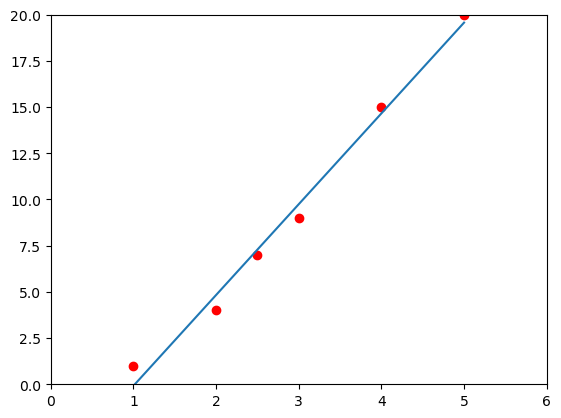

In [50]:
import matplotlib.pyplot as plt
import numpy as np
x = [1, 2, 2.5, 3, 4, 5]
y = [1, 4, 7, 9, 15, 20]
plt.plot(x,y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()



In [51]:
!pip3 install -q  sklearn

from __future__ import absolute_import,division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow as tf 

import tensorflow.compat.v2.feature_column as fc 

In [52]:
# load data
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain.head())
print(y_train)
print(dftrain.loc[0], y_train.loc[0])
print(dftrain.age)
print(dftrain)
print(dftrain.max)

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0     

In [53]:
# describe data
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [54]:
# shape
dftrain.shape

(627, 9)

<AxesSubplot: >

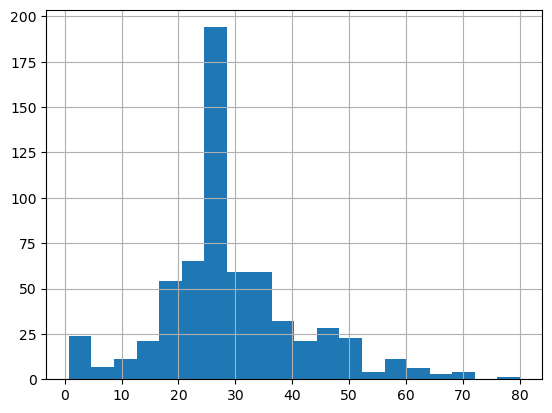

In [55]:
# draw a histogram
dftrain.age.hist(bins=20)

In [56]:
# draw bar graph
dftrain.age.backfill()

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64

<AxesSubplot: >

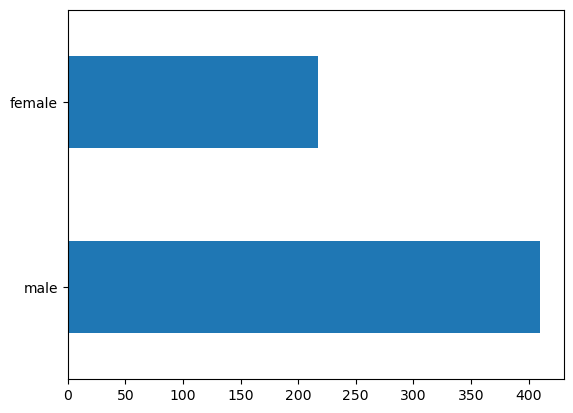

In [57]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot: >

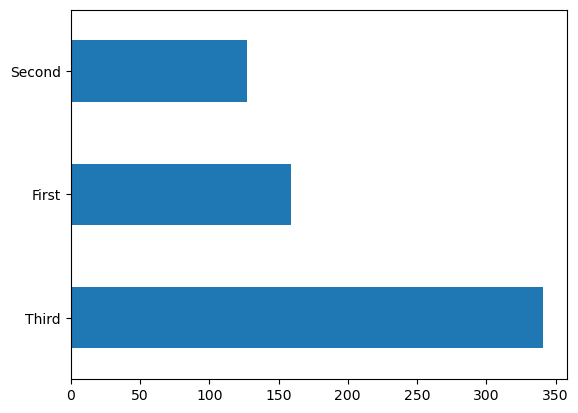

In [58]:
dftrain['class'].value_counts().plot(kind='barh')

In [59]:
# test data , number of entry
dfeval.shape

(627, 9)

In [60]:
# load data
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

CATEGORICAL_COLUMNS = ["sex", "n_siblings_spouses", "parch", "class", "deck", "embark_town", "alone"]
NUMERIC_COLUMNS = ["age", "fare"]

feature_columns = []
for feature_name  in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [61]:
dftrain["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [62]:
# training the data to get a better prediction
# Epochs are streams of entrire dataset 
# incrementally to 
def make_input_fn(data_df, label_df, num_epochs=20, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result['auc'])

result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[2])

0.8612343
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmprqzkh6t2/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                        female
age                          26.0
n_siblings_spouses              0
parch                           0
fare                        7.925
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 2, dtype: object


In [63]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Veriscolor', 'Virginica']
s = CSV_COLUMN_NAMES[0] + SPECIES[0]
print(s)

SepalLengthSetosa


In [64]:
train_path = tf.keras.utils.get_file(
    'iris_training.csv', "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")

test_path = tf.keras.utils.get_file(
    'iris_training.csv', "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [65]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [66]:
train.shape

(120, 5)

In [67]:
train_y = train.pop("Species")
test_y = test.pop("Species")
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [68]:
s = train_y.head()
print(s)

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64


In [69]:
def input_fn(features, labels, training=True, batch_size=256):
    # convert inputs to a dataset
    dataset = tf.data.Dataset.from_tensor_slices(dict(features), labels)

    # Shuffle and repeat if in training mode
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

In [76]:
# add feature columns
my_feature_columns =[]
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

# bullding the model
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns, hidden_units=[30, 10],
    n_classes=3
)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmnpzs693', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_m

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().